# The Language of Quotations in Journals

Do specialists quote different types of language from nonspecialists? 

In [42]:
import spacy
import textacy
import nltk
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
mm = open('../middlemarch.txt').read()

In [3]:
df = pd.read_json('../txt/e2a.json')

In [4]:
grouped = df.groupby('journal')

In [5]:
def getText(ranges): 
    texts = []
    for rangeSet in ranges: 
        for textRange in rangeSet: 
#             print(textRange)
            if len(textRange) > 1: 
                text = mm[textRange[0]:textRange[1]]
                texts.append(text)
    return texts

In [6]:
journalDict = {}
for journal in grouped: 
    journalDict[journal[0]] = journal[1]['Locations in A'].values

In [7]:
textDict = {}
for journal in journalDict: 
    textDict[journal] = getText(journalDict[journal])

In [8]:
specialistText = ' '.join(textDict.pop('George Eliot - George Henry Lewes Studies'))
specialistText = specialistText.replace('\n', ' ')

In [9]:
nonSpecialistText = ' '.join([' '.join(item) for item in textDict.values()])
nonSpecialistText = nonSpecialistText.replace('\n', ' ')

In [10]:
st = textacy.Doc(specialistText)
nst = textacy.Doc(nonSpecialistText)

In [11]:
stBag = st.to_bag_of_terms(as_strings=True, weighting='freq')
nstBag = nst.to_bag_of_terms(as_strings=True, weighting='freq')

In [12]:
stArray = pd.Series(stBag)
nstArray = pd.Series(nstBag)

In [59]:
# Negative values are distinctive of nonspecialists. 
# Positive values are distinctive of specialists. 
(stArray - nstArray).fillna(0).sort_values()

dorothea        -0.001996
live            -0.000711
say             -0.000653
eye             -0.000600
year            -0.000594
soul            -0.000538
thought         -0.000506
need            -0.000489
life            -0.000475
time            -0.000471
feeling         -0.000468
cadwallader     -0.000451
light           -0.000448
bring           -0.000448
turn            -0.000448
new             -0.000442
far             -0.000436
human           -0.000433
fact            -0.000433
consciousness   -0.000430
sense           -0.000415
day             -0.000413
speak           -0.000401
call            -0.000401
possible        -0.000401
deep            -0.000398
world           -0.000392
knowledge       -0.000392
shape           -0.000383
social          -0.000366
                   ...   
green            0.000503
pretty           0.000503
bare             0.000503
beautiful        0.000506
gentleman        0.000506
say mrs.         0.000520
spend            0.000526
mean        

In [47]:
def POSRepresentation(text): 
    return [pair[1] for item in text.pos_tagged_text for pair in item]

def tagRepresentation(text): 
    return [w.tag_ for w in text.spacy_doc]

def POSStats(text): 
#     rep = POSRepresentation(text)
    rep = tagRepresentation(text)
    length = len(rep)
    s = pd.Series(rep).value_counts()/length
    return s

stPOS = POSStats(st)
nstPOS = POSStats(nst)

In [53]:
df = pd.DataFrame([stPOS, nstPOS], index=['Specialists', 'Nonspecialists']).T

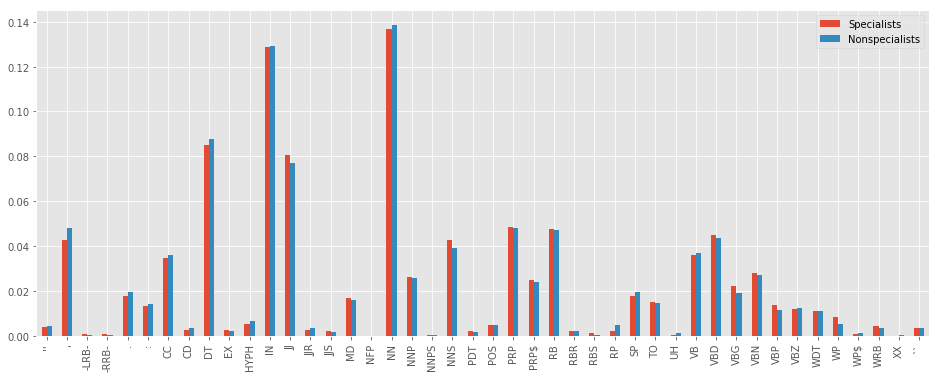

In [54]:
df.plot(kind='bar', figsize=(16,6))

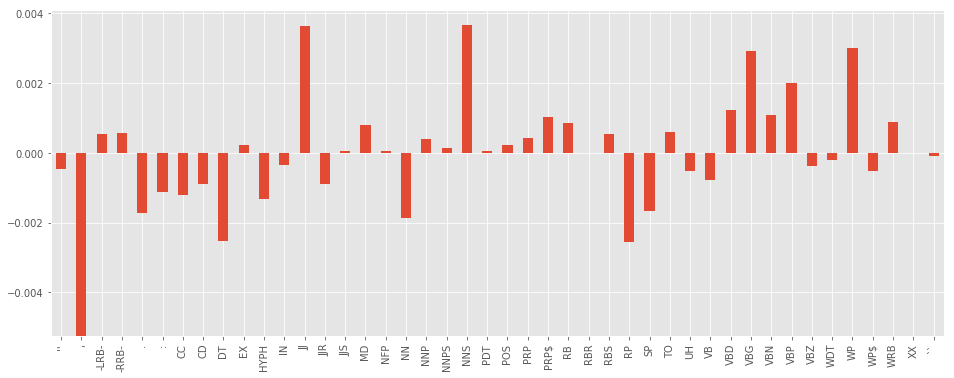

In [58]:
(df['Specialists'] - df['Nonspecialists']).plot(kind='bar', figsize=(16,6))